In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [28]:
# Cargar conjunto de datos
datos = sns.load_dataset('iris')

# Mostrar las primeras filas
datos.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
# Mostrar información general del conjunto de datos
datos.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
# Comprobar datos faltantes
datos.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [31]:
# Ver tipos de datos
datos.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [32]:
# Obtener dummies
datos_dummies = pd.get_dummies(datos)


# Ver matriz de correlación
matriz_correlacion = datos_dummies.corr()
matriz_correlacion

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
sepal_length,1.000000,-0.117570,0.871754,0.817941,-0.717416,0.079396,0.638020
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.603348,-0.467703,-0.135645
petal_length,0.871754,-0.428440,1.000000,0.962865,-0.922765,0.201754,0.721011
petal_width,0.817941,-0.366126,0.962865,1.000000,-0.887344,0.117899,0.769445
species_setosa,-0.717416,0.603348,-0.922765,-0.887344,1.000000,-0.500000,-0.500000
species_versicolor,0.079396,-0.467703,0.201754,0.117899,-0.500000,1.000000,-0.500000
species_virginica,0.638020,-0.135645,0.721011,0.769445,-0.500000,-0.500000,1.000000


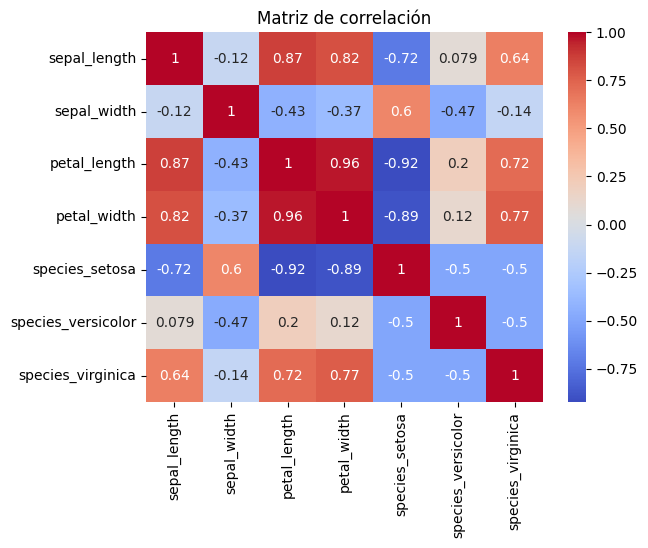

In [33]:
sns.heatmap(matriz_correlacion, annot=True , cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [34]:
# Separar variables independientes y dependiente
X = datos.drop('species', axis=1)
y = datos['species']

In [35]:
# Crear conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Crear y entrenar modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Guardar modelo en un archivo
joblib.dump(modelo_rf, 'modelo_rf.pkl')

['modelo_rf.pkl']

In [38]:
# Cargar modelo
modelo_cargado = joblib.load('modelo_rf.pkl')


In [39]:
# Realizar predicciones
nuevos_datos = [[5.1, 3.5, 1.4, 0.2]]
prediccion = modelo_cargado.predict(nuevos_datos)
print("Predicción: ", prediccion)

Predicción:  ['setosa']


c:\Users\Felipe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
# Evaluar modelo
y_pred = modelo_cargado.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: ", accuracy)
print("Reporte de clasificación: ")
print(classification_report(y_test, y_pred))


Precisión del modelo:  1.0
Reporte de clasificación: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

